## Desafio parte 1

### Análise exploratória para entendimento das principais características dos dados.

### Nomes:
    - Felipe Gomes Valencio.
    - Rodrigo William Chavoni

### Bibliotecas

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Dataset

In [110]:
df = pd.read_csv('data/X_trainToronto.csv')

### Colunas não utilizadas

In [111]:
df.drop(columns=['postal_code', 'address', 'loc'], inplace=True)

### Primeiras Informações

In [112]:
df.head()

,business_id,name,latitude,longitude,review_count,is_open,attributes,categories,hours,destaque
0,vHzWmPWHN4J1hRR3W3AMQg,Salt Wine Bar,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...",0
1,15to24Q-otAHmto7FzsWRg,William's Beauty Supplies,43.654002,-79.452189,3,1,"{'BusinessParking': ""{'garage': False, 'street...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1
2,8aqKdf4G4AAir8k_Kdslvg,Integra Health Centre,43.648493,-79.383214,18,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0
3,uxU1vr5AhhkTQ83X0bpeyg,North York General Hospital,43.772453,-79.448136,3,0,{'ByAppointmentOnly': 'False'},"Health & Medical, Hospitals, Medical Centers",NaN,0
4,f702hTJoqdR34Jn23C7d1A,Dr Jamie's Bike Clinic,43.665082,-79.460800,3,1,{'RestaurantsPriceRange2': '3'},"Automotive, Bikes, Shopping, Auto Repair, Spor...",NaN,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17582 entries, 0 to 17581
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   17582 non-null  object 
 1   name          17582 non-null  object 
 2   latitude      17582 non-null  float64
 3   longitude     17582 non-null  float64
 4   review_count  17582 non-null  int64  
 5   is_open       17582 non-null  int64  
 6   attributes    15014 non-null  object 
 7   categories    17555 non-null  object 
 8   hours         12905 non-null  object 
 9   destaque      17582 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.3+ MB


- A coluna attributes possue informações de forma desestruturada.
- Os dados que mais serão utilizados nessa análise inicial estão completos.

### Distribuíção da quantidade de Review

/tmp/ipykernel_4812/2887557748.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='review_count', data=df[df.review_count > 5],palette='viridis', bins=50)


Text(0.5, 0, 'Número de Reviews')

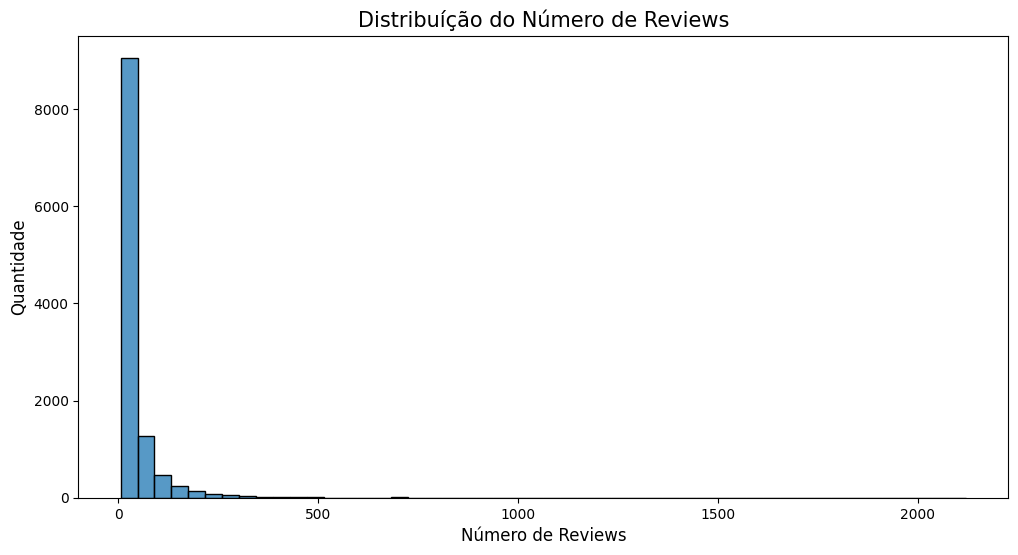

In [114]:
plt.figure(figsize=(12,6))
sns.histplot(x='review_count', data=df[df.review_count > 5],palette='viridis', bins=50)
plt.title('Distribuíção do Número de Reviews', fontsize=15)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Número de Reviews', fontsize=12)

- Os dados da quantidade de reviews possue uma assimetria negativa.
- A grande maioria dos estabelecimentos possuem menos de 100 reviews.

### Estabelecimentos com Maior Número de Reviews

Text(0.5, 0, 'Número de Reviews')

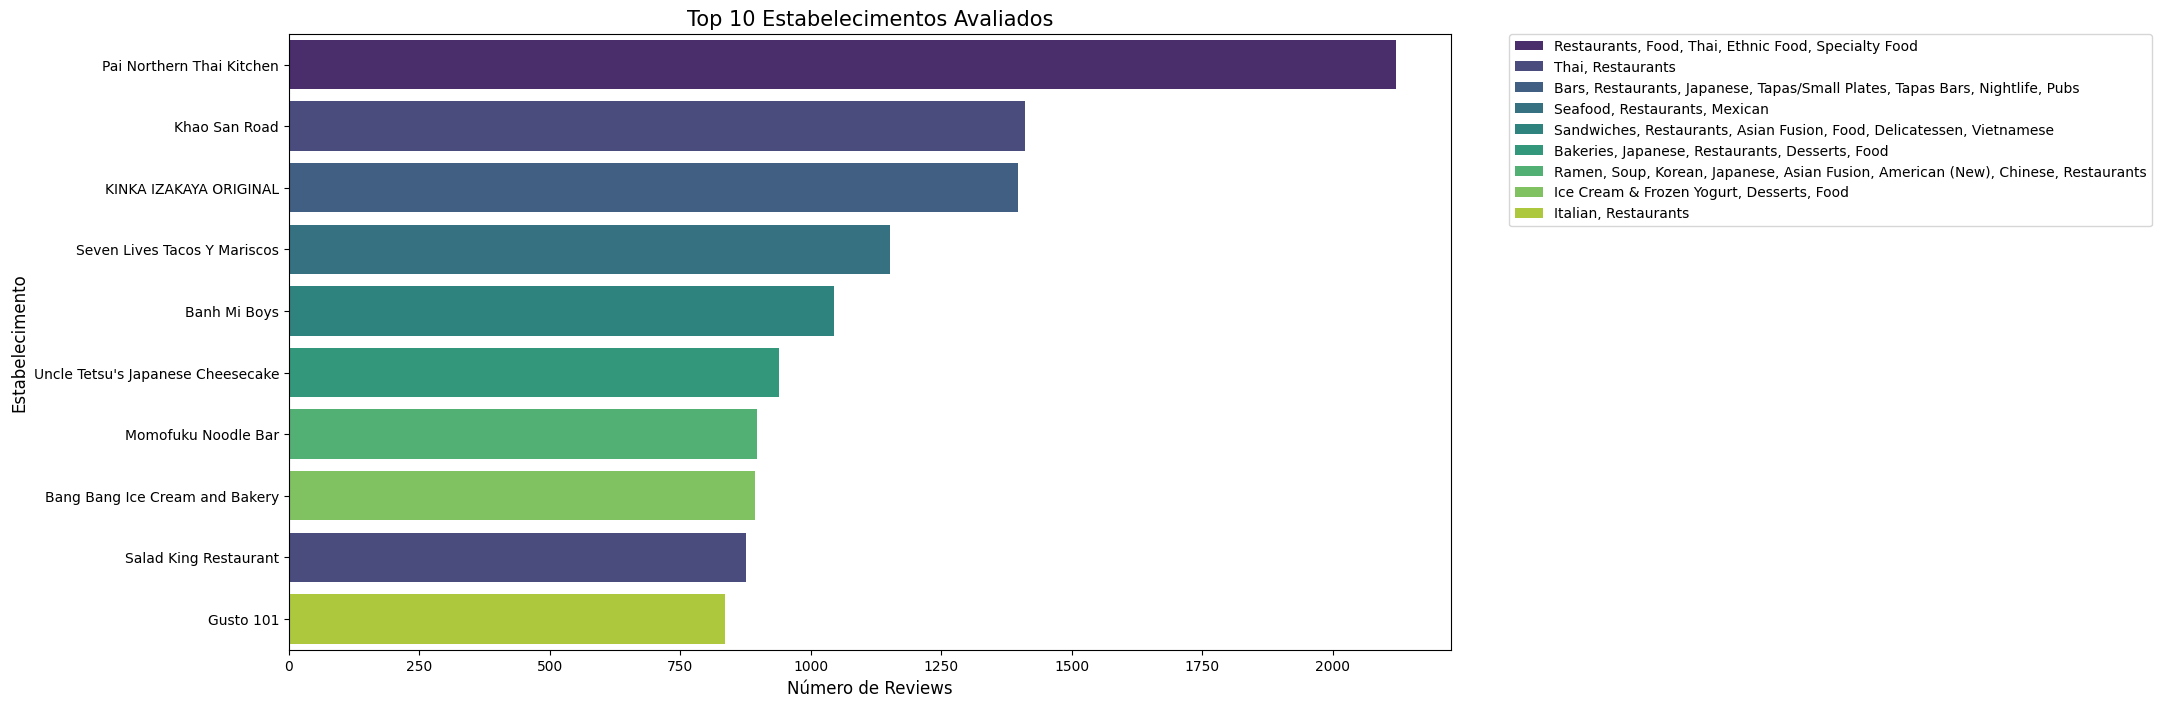

In [115]:
df_max_reviews = df[['name','categories','review_count']].sort_values(by='review_count',ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='review_count', y='name', hue='categories', data=df_max_reviews,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Top 10 Estabelecimentos Avaliados', fontsize=15)
plt.ylabel('Estabelecimento', fontsize=12)
plt.xlabel('Número de Reviews', fontsize=12)

- Os principais estabelecimentos que recebem review são todos restaurantes.
- Outra característica é que são restaurantes relacionados as culinárias Thailandes ou japonesa 

### Estabelecimentos Fechados com Maior Número de Reviews

Text(0.5, 0, 'Número de Reviews')

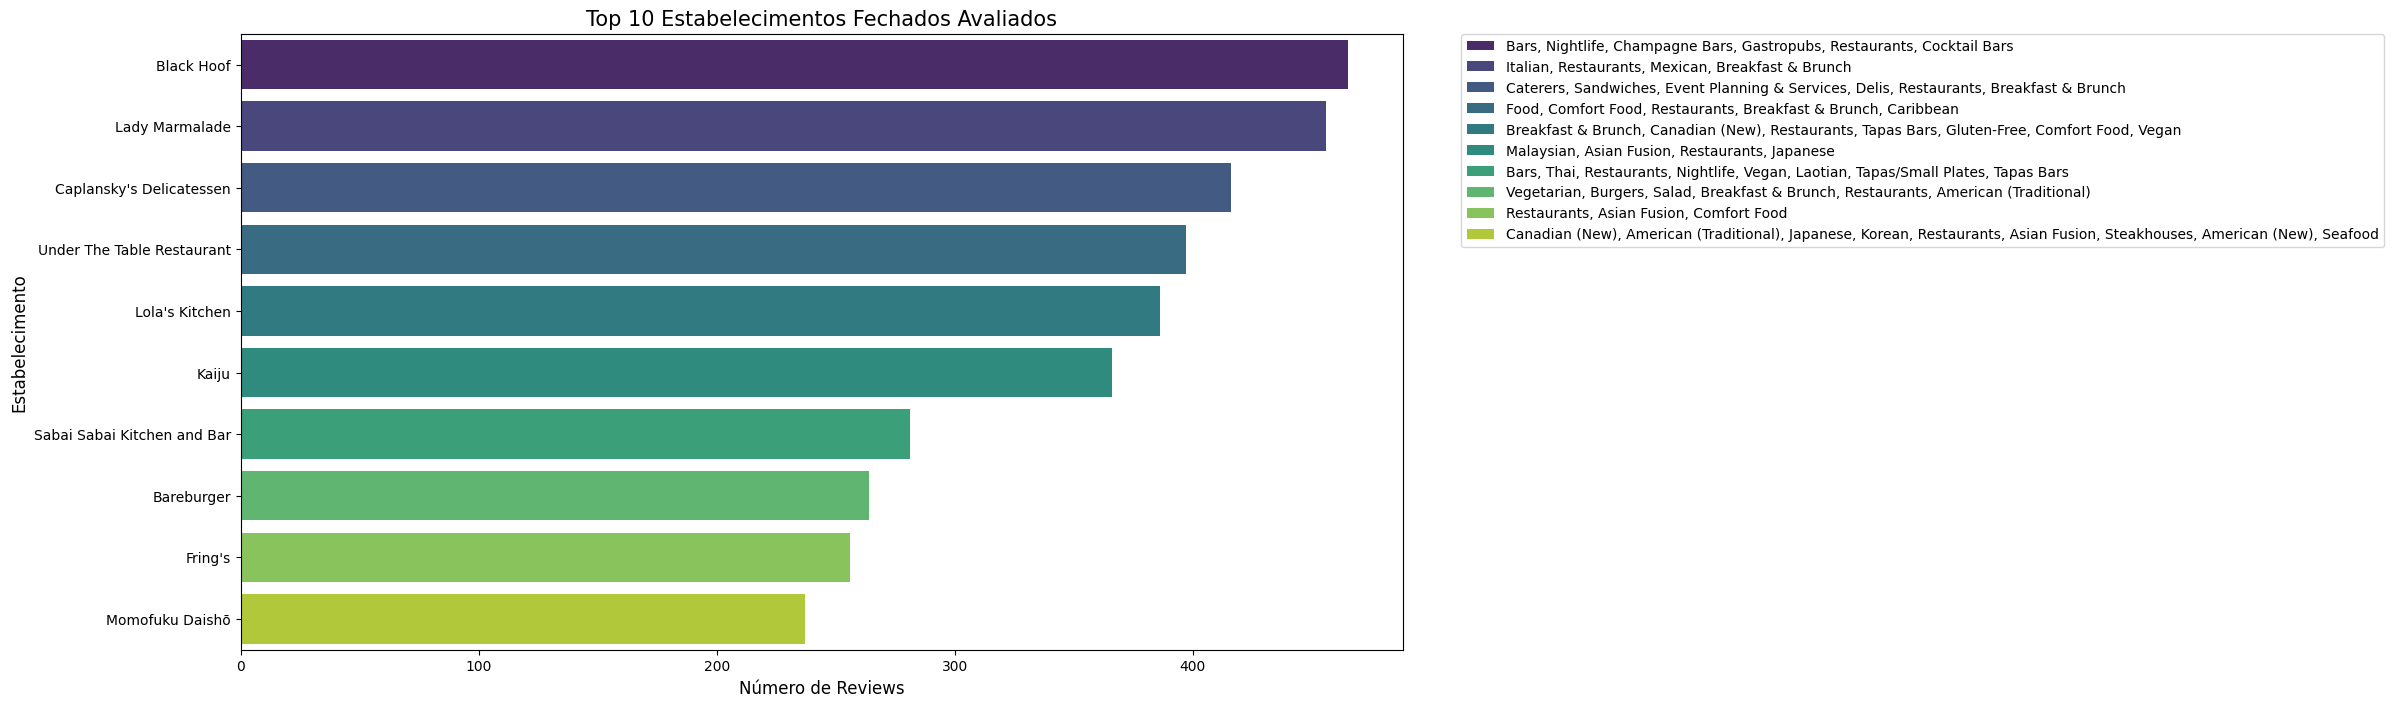

In [116]:
df_fechado = df[df.is_open == 0].sort_values(by='review_count',ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='review_count', y='name', hue='categories', data=df_fechado,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Top 10 Estabelecimentos Fechados Avaliados', fontsize=15)
plt.ylabel('Estabelecimento', fontsize=12)
plt.xlabel('Número de Reviews', fontsize=12)

- Interessaante notar que os estabelecimentos que mais receberam reviews e já fecharam não possuem grandes quantidades de reviews.
- Será que esses estabelecimentos foram pouco visitados, ou não chamaram atenção nem para um lado negativo, nem para um lado positivo, para receber reviews?
- São poucos os restaurantes mais avaliados e que já estão fechados que são relacionados com os pricipais restaurantes avaliados. 
- É possível que aquela região seja mais relacionada a culturas japonesa/tailandesa.

### Categorias com Maior Quantidade de Avaliações

In [117]:
df_categorias = df.groupby(['categories']).size().sort_values(ascending=False).head(10).reset_index(name='count')

/tmp/ipykernel_4812/2480352070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')


Text(0.5, 0, 'Número de Estabelecimentos')

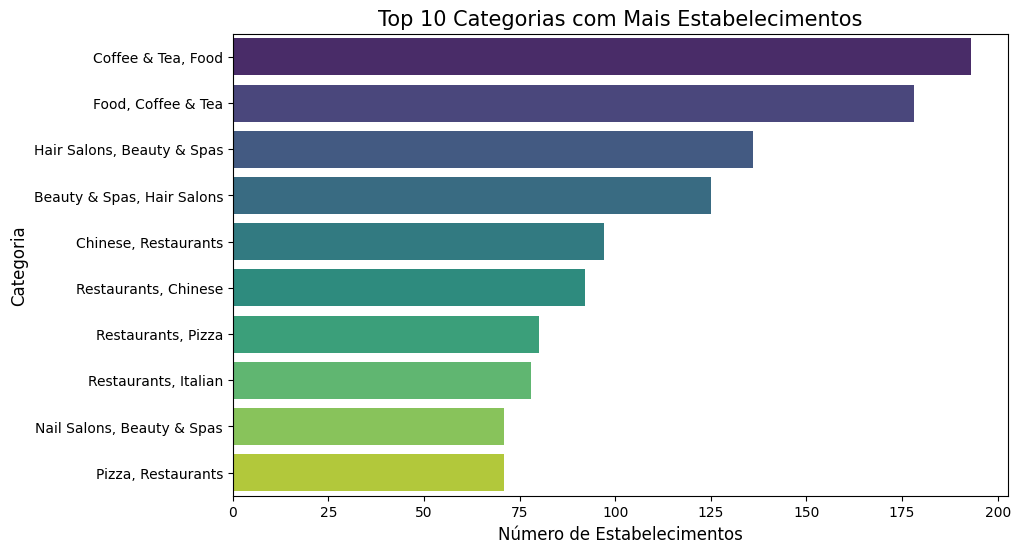

In [118]:
df_categorias = df.groupby('categories').size().sort_values(ascending=False).head(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')
plt.title('Top 10 Categorias com Mais Estabelecimentos', fontsize=15)
plt.ylabel('Categoria', fontsize=12)
plt.xlabel('Número de Estabelecimentos', fontsize=12)

- As coluna categories possuem mais de um tipo de categoria.
- Dessa forma dificulda a visualização, e por isso, faremos uma análise da frequência dos termos.
- Para uma análise mais realista, termos que em geral, estão relacionados as mesmas coisas serão unificados
- As mudanças feitas foram:

    - Food: Food/Coffe & Tea
    - Restaurants: Food/Coffe & Tea 
    - Coffee & Tea: Food/Coffe & Tea 
    - Specialty Food: Food/Coffe & Tea
    - Sandwiches: Food/Coffe & Tea
    - Chinese: Food/Coffe & Tea
    - Breakfast & Brunch : Food/Coffe & Tea
    - Bars : Nightlife
    
- Essas categorias foram tradas por representar a maior parte dos estabelecimentos, para uma análise mais exata seria necessário revisar todas as categorias, evitando assim estabelecimentos duplicados.

### Frequência de Termos das categorias

- Análisaremos os tipos de categorias mais frenquentes a partir da quantidade de reviews, ou seja, um estabelecimento pode ser contado para todas as categorias que participa.

In [128]:
# Split categories by comma and stack them into new rows
df_expanded = df['categories'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Assign a name to the new column created
df_expanded.name = 'category'

# Create a new DataFrame by joining the expanded categories with the original DataFrame
df_new = df.join(df_expanded)

mapeamento = {'Food' : 'Food/Coffe & Tea', 'Restaurants': 'Food/Coffe & Tea', 'Coffee & Tea': 'Food/Coffe & Tea', 'Specialty Food':'Food/Coffe & Tea',
              'Sandwiches': 'Food/Coffe & Tea', 'Bars' : 'Nightlife', 'Chinese': 'Food/Coffe & Tea', 'Breakfast & Brunch' : 'Food/Coffe & Tea'}
df_new['category'] = df_new['category'].map(mapeamento).fillna(df_new['category'])

df_new.drop_duplicates(subset=['business_id','category'], inplace=True)

df_final = df_new.drop('categories', axis=1)

# Reset the index
df_final.reset_index(drop=True, inplace=True)

- Assim, será gerada uma coluna de proporção da quatidade de reviews por categoria em relação a quantidade de estabelecimentos por categoria

/tmp/ipykernel_4812/1961689727.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='proporcao', y='category', data=df_categorias, palette='viridis')


<Axes: xlabel='proporcao', ylabel='category'>

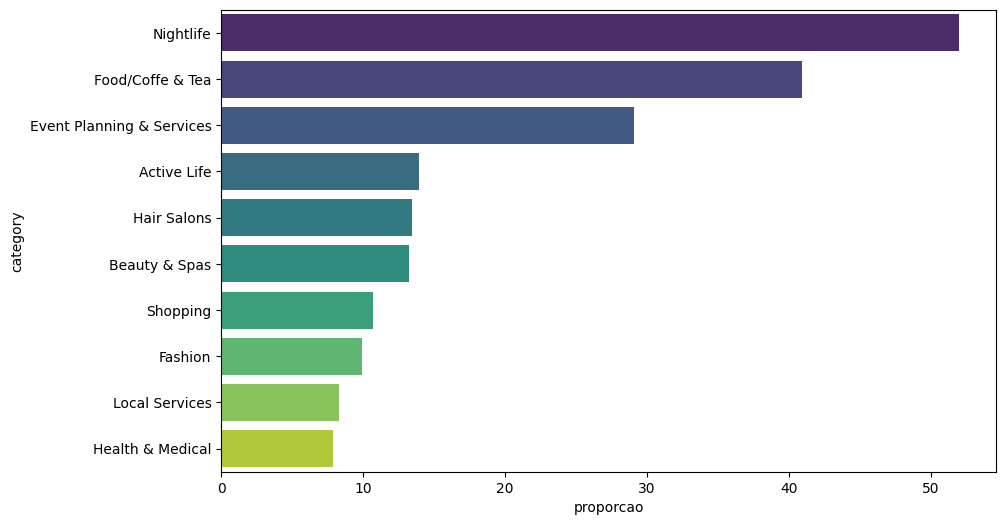

In [129]:
df_categorias1 = df_final.groupby('category').size().sort_values(ascending=False).head(10).reset_index(name='count')
df_categorias2 = df_final.groupby('category')['review_count'].sum()
df_categorias = pd.merge(df_categorias1, df_categorias2, on='category')

df_categorias['proporcao'] = df_categorias['review_count'] / df_categorias['count']


df_categorias.sort_values(by='proporcao',ascending=False, inplace=True)


plt.figure(figsize=(10, 6))
sns.barplot(x='proporcao', y='category', data=df_categorias, palette='viridis')

- Feita a proporção, podemos ter uma noção melhor das categorias que mais recebem avaliações.
- Embora Food/Coffee & Tea seja a categoria que tem mais reviews, quando obtemos a proporção de reviews por quantidade de estabelecimentos daquela categoria, é possível obeservar que a categoria Nightlife possui mais reviews no geral. 

### Mapa de calor dos estabelecimentos

In [122]:
# Criação do mapa de Ontario
city_center = (43.651070, -79.347015)
map_city = folium.Map(location=city_center, zoom_start=12)  # Adjust zoom level as needed

In [123]:
# Converter o dataframe para lista de listas (Formato necessário para o heatmap pretendido)
heat_data = [[row['latitude'], row['longitude'], row['review_count']] for index, row in df.iterrows()]

# Adicionar o heatmap ao mapa da cidade
HeatMap(heat_data).add_to(map_city)

# Adicionar legenda
min_reviews = df['review_count'].min()
max_reviews = df['review_count'].max()

colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_reviews, vmax=max_reviews)
colormap.caption = 'Number of Reviews'
map_city.add_child(colormap)

- Interessante notar neste mapa a quantidade de reviews do dataset. Podemos navegar e encontrar os pontos comerciais da cidade de Toronto, como shoppings, avenidas principais e ruas com cadeias de bares e restaurantes. Também muito interessante a diferença da região central da cidade para regiões mais periféricas.

- Também poderia ser criado filtros a partir das categorias dos estabelecimentos, assim seria possível ver as regiões com os restaurantes mais avaliados por exemplo.